# Kunskapskontroll 2 - Modellera MNIST 

Uppgift: Använd maskininlärning för att modellera MNIST datan. Utvärdera minst två olika modeller och gör ett komplett ML-flöde, från att ladda in data till att utvärdera den bäst valda modellen på test data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.datasets import fetch_openml

# Datan laddas in samt en kort EDA

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

print(mnist.DESCR)

C:\Users\camil\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
for key, value in mnist.details.items():
    print(key + ":", value)

id: 554
name: mnist_784
version: 1
description_version: 2
format: ARFF
creator: ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges']
upload_date: 2014-09-29T03:28:38
language: English
licence: Public
url: https://api.openml.org/data/v1/download/52667/mnist_784.arff
parquet_url: https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq
file_id: 52667
default_target_attribute: class
tag: ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision']
visibility: public
minio_url: https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq
status: active
processing_date: 2020-11-20 20:12:09
md5_checksum: 0298d579eb1b86163de7723944c7e495


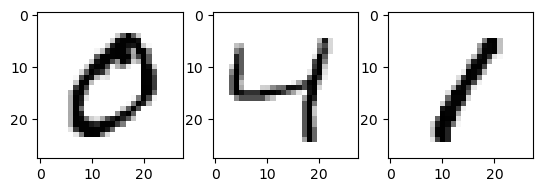

In [7]:
# Exempel på hur siffrorna ser ut

plt.subplot(1, 3, 1)
some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

plt.subplot(1, 3, 2)
some_other_digit = X[2]
some_other_digit_image = some_other_digit.reshape(28, 28)
plt.imshow(some_other_digit_image, cmap=mpl.cm.binary)

plt.subplot(1, 3, 3)
some_digit = X[3]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

# Datasetet delas in i träning, validering och test

In [8]:
# Använder mindre data för att snabba upp träningen

X_train = X[:10000]
y_train = y[:10000]
X_val = X[10000:12000]
y_val = y[10000:12000]

X_test = X[12000:14000]
y_test = y[12000:14000]

# Förberedelse av data genom användning av StandardScaler

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  
X_test_scaled = scaler.transform(X_test)  

# Tre olika modeller skapas, tränas, utvärderas och förbättras

# Support Vector Machine

In [10]:
# Skapa modell

svm_clf = SVC(random_state=42)

In [11]:
# Träna modell på träningsdata

svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [12]:
# Utvärdera modell med classification report

print("SVM Classifier:")
y_pred_svm = svm_clf.predict(X_val_scaled)
print(classification_report(y_val, y_pred_svm))

SVM Classifier:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       205
           1       0.96      0.97      0.97       224
           2       0.82      0.97      0.89       185
           3       0.95      0.88      0.91       196
           4       0.95      0.95      0.95       204
           5       0.96      0.96      0.96       185
           6       0.96      0.95      0.95       194
           7       0.98      0.94      0.96       209
           8       0.94      0.91      0.92       183
           9       0.95      0.93      0.94       215

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.94      0.94      2000



Confusion Matrix för SVM Classifier:


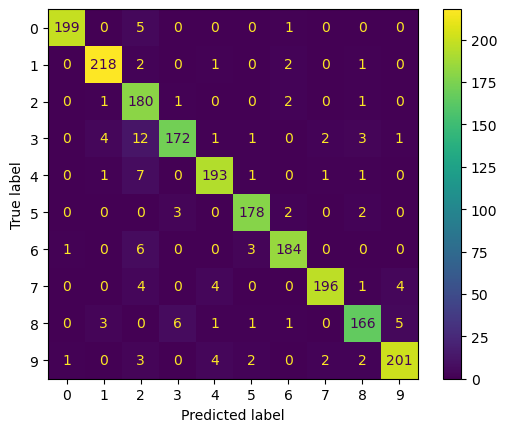

In [13]:
# Utvärdera modell med confusion matrix

print("Confusion Matrix för SVM Classifier:")
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm)
ConfusionMatrixDisplay(conf_matrix_svm).plot()

In [14]:
# Optimering av hyperparametrar med GridSearchCV
svm_clf_grid = SVC(random_state=42)

hyper_param_grid_svm = [
    {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]
gs_svm = GridSearchCV(svm_clf_grid, hyper_param_grid_svm, cv=3)
gs_svm.fit(X_train_scaled, y_train)

print("Bästa hyperparametrar för SVM:", gs_svm.best_params_)

Best parameters for SVM: {'C': 0.5, 'gamma': 1, 'kernel': 'poly'}


In [15]:
# Utvärdera SVM-modellen på testdatan

y_pred_svm_test = gs_svm.best_estimator_.predict(X_test_scaled)
print("SVM Classifier Testresultat:")
print(classification_report(y_test, y_pred_svm_test))

SVM Classifier Testresultat:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       199
           1       1.00      1.00      1.00       222
           2       0.95      0.90      0.92       191
           3       0.96      0.93      0.95       226
           4       0.95      0.97      0.96       185
           5       0.97      0.94      0.95       178
           6       0.97      0.98      0.98       185
           7       0.96      0.99      0.98       204
           8       0.90      0.96      0.93       206
           9       0.96      0.94      0.95       204

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



# Random Forest

In [16]:
# Skapa modell

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [17]:
# Träna modell

rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Utvärdera modell med classification report

print("Random Forest Classifier:")
y_pred_rf = rf_clf.predict(X_val_scaled)
print(classification_report(y_val, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       205
           1       0.96      0.97      0.97       224
           2       0.90      0.97      0.94       185
           3       0.94      0.89      0.92       196
           4       0.96      0.97      0.96       204
           5       0.97      0.94      0.95       185
           6       0.98      0.97      0.97       194
           7       0.97      0.95      0.96       209
           8       0.92      0.92      0.92       183
           9       0.94      0.94      0.94       215

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



Confusion Matrix för Random Forest Classifier:


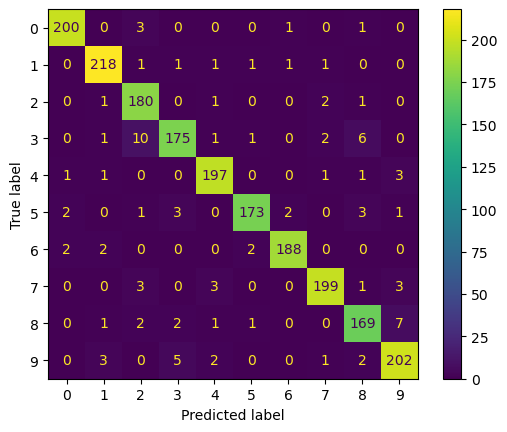

In [19]:
# Utvärdera modell med confusion matrix

print("Confusion Matrix för Random Forest Classifier:")
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
ConfusionMatrixDisplay(conf_matrix_rf).plot()

In [20]:
# Optimering av hyperparametrar med GridSearchCV

rf_clf_grid = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gs_rf = GridSearchCV(rf_clf_grid, param_grid_rf, cv=3)
gs_rf.fit(X_train_scaled, y_train)

print("Bästa hyperparametrar för Random Forest:", gs_rf.best_params_)

Bästa hyperparametrar för Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [21]:
# Utvärdera Random Forest-modellen på testdatan

y_pred_rf_test = gs_rf.best_estimator_.predict(X_test_scaled)
print("Random Forest Classifier Testresultat:")
print(classification_report(y_test, y_pred_rf_test))

Random Forest Classifier Testresultat:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       199
           1       0.98      1.00      0.99       222
           2       0.94      0.88      0.91       191
           3       0.92      0.91      0.92       226
           4       0.94      0.97      0.95       185
           5       0.97      0.94      0.95       178
           6       0.95      0.97      0.96       185
           7       0.93      0.99      0.96       204
           8       0.91      0.91      0.91       206
           9       0.94      0.91      0.92       204

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



# K-Nearest Neighbors

In [22]:
# Skapa modell

knn_clf = KNeighborsClassifier(n_neighbors=5)

In [23]:
# Träna modell

knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [24]:
# Utvärdera modell med classification report

print("KNN Classifier:")
y_pred_knn = knn_clf.predict(X_val_scaled)
print(classification_report(y_val, y_pred_knn))

KNN Classifier:


C:\Users\camil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\camil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       205
           1       0.91      0.99      0.95       224
           2       0.92      0.91      0.92       185
           3       0.88      0.90      0.89       196
           4       0.93      0.87      0.90       204
           5       0.92      0.87      0.89       185
           6       0.91      0.95      0.93       194
           7       0.94      0.91      0.92       209
           8       0.94      0.80      0.86       183
           9       0.84      0.91      0.88       215

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



Confusion Matrix för KNN Classifier:


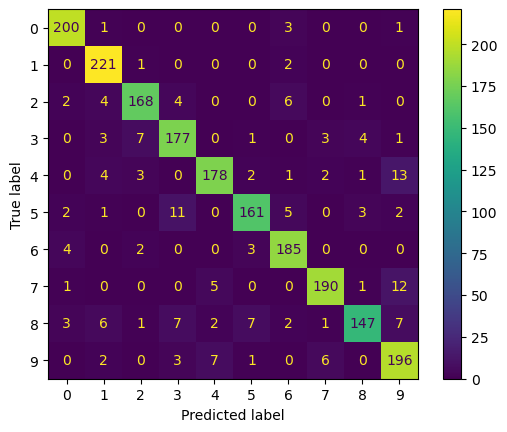

In [25]:
# Utvärdera modell med confusion matrix

print("Confusion Matrix för KNN Classifier:")
conf_matrix_knn = confusion_matrix(y_val, y_pred_knn)
ConfusionMatrixDisplay(conf_matrix_knn).plot()

In [26]:
# Optimering av hyperparametrar med GridSearchCV

knn_clf_grid = KNeighborsClassifier()

param_grid_knn = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
gs_knn = GridSearchCV(knn_clf_grid, param_grid_knn, cv=3, verbose=3)
gs_knn.fit(X_train_scaled, y_train)

print("Bästa hyperparametrarna för KNN:", gs_knn.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.903 total time=   0.3s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.902 total time=   0.4s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.890 total time=   0.4s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.907 total time=   0.4s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.909 total time=   0.4s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.893 total time=   0.4s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.900 total time=   0.4s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.903 total time=   0.4s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.890 total time=   0.4s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.909 total time=   0.4s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.910 total time=   0.4s
[CV 3/3] END ...n_neighbors=4, weights=distance;,

In [27]:
# Utvärdera KNN-modellen på testdatan

y_pred_knn_test = gs_knn.best_estimator_.predict(X_test_scaled)
print("KNN Classifier Testresultat:")
print(classification_report(y_test, y_pred_knn_test))

KNN Classifier Testresultat:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       199
           1       0.94      0.99      0.96       222
           2       0.91      0.87      0.89       191
           3       0.91      0.89      0.90       226
           4       0.93      0.90      0.92       185
           5       0.91      0.84      0.88       178
           6       0.90      0.96      0.93       185
           7       0.91      0.94      0.93       204
           8       0.91      0.85      0.88       206
           9       0.87      0.89      0.88       204

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



# Den bästa modellen tränas och utvärderas nu på hela datasetet

SVM

In [28]:
# Hämta hela datasetet

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

C:\Users\camil\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [29]:
# Dela upp datasetet i tränings-, validerings- och testuppsättningar

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) 
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)

In [30]:
# Skala datan

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Skapa en SVM-klassificerare med bästa hyperparametrarna

svm_clf = SVC(C=0.5, gamma=1, kernel='poly', random_state=42)

In [32]:
# Träna modellen på den skalerade träningsdatan

svm_clf.fit(X_train_scaled, y_train)

SVC(C=0.5, gamma=1, kernel='poly', random_state=42)

In [33]:
# Evaluera modellen på testdatan

y_pred_test_svm = svm_clf.predict(X_test_scaled)
print("Classification Report for SVM on Test Data:")
print(classification_report(y_test, y_pred_test_svm))

Classification Report for SVM on Test Data:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.98      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.97      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.98      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.97      0.97      0.97      1357
           9       0.97      0.95      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



Confusion Matrix för SVM på Testdata:


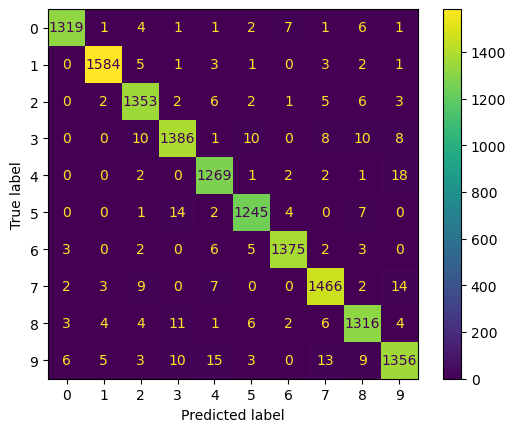

In [34]:
print("Confusion Matrix för SVM på Testdata:")
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
ConfusionMatrixDisplay(conf_matrix_test_svm).plot()
plt.show()

In [35]:
import joblib

In [36]:
# Spara den tränade modellen

joblib.dump(svm_clf, 'svm_model.pkl')

['svm_model.pkl']